### Visualization

In [1]:
#importing libraris
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#defining a path
path=r'C:\Users\banda\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_with_flag_final.pkl'))

In [3]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,Number_of_dependants,Family_status,income,region,cust-5_flag,age_group,income_Group,department
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages


In [4]:
df.shape

(30964564, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int32         
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float64       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int32         
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int32         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest_period_of_day   object        
 15  busiest_days            object        
 16  max_order               int32         
 17  loyalty_flag            object        
 18  

In [8]:
#creating subset to avoid RAm ISsues
Sub_df=df[['Family_status','income_Group','age_group','order_id','user_id','order_number','department','Number_of_dependants','price_range_loc','Spending_flag','region']]

#### Creating Chart that shows deparment and number of order

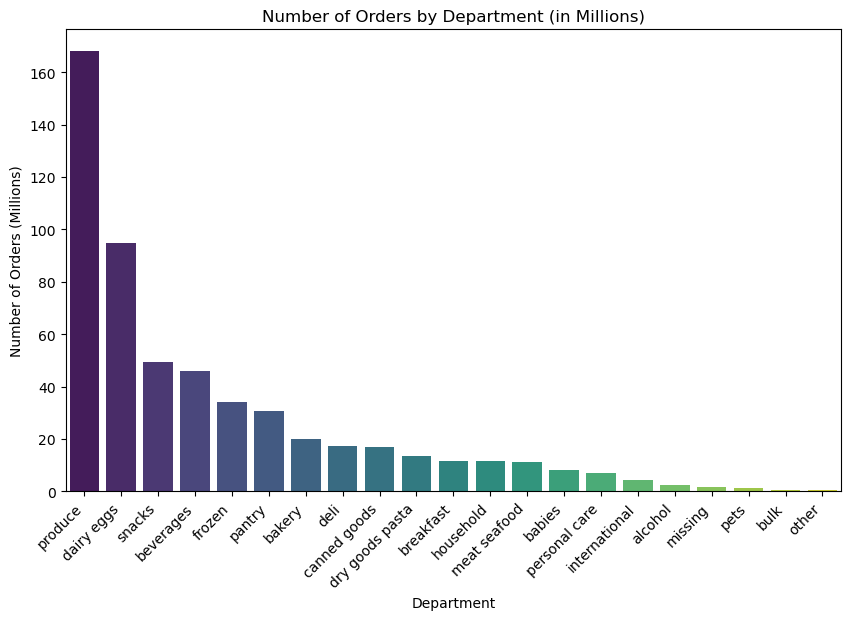

In [42]:
# Group by 'department' and calculate the sum of 'order_number'
orders_by_department = Sub_df.groupby('department')['order_number'].sum()

# Convert the sum to millions for better readability
orders_by_department_in_millions = orders_by_department / 1000000

# Sort the DataFrame by the number of orders in descending order
sorted_orders_by_department = orders_by_department_in_millions.sort_values(ascending=False)

# Plot the bar chart with seaborn
plt.figure(figsize=(10, 6))
ss=sns.barplot(x=sorted_orders_by_department.index, y=sorted_orders_by_department, palette='viridis')

# Customize the plot
plt.title('Number of Orders by Department (in Millions)')
plt.xlabel('Department')
plt.ylabel('Number of Orders (Millions)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

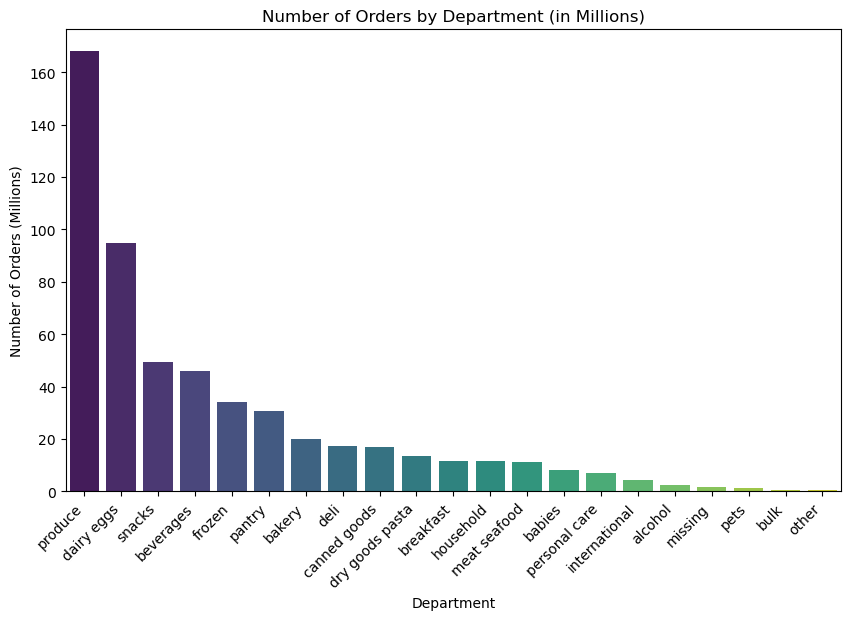

In [43]:
ss.figure

In [44]:
ss.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_order_Freq.png')) #to export data visualization

<Figure size 1200x800 with 0 Axes>

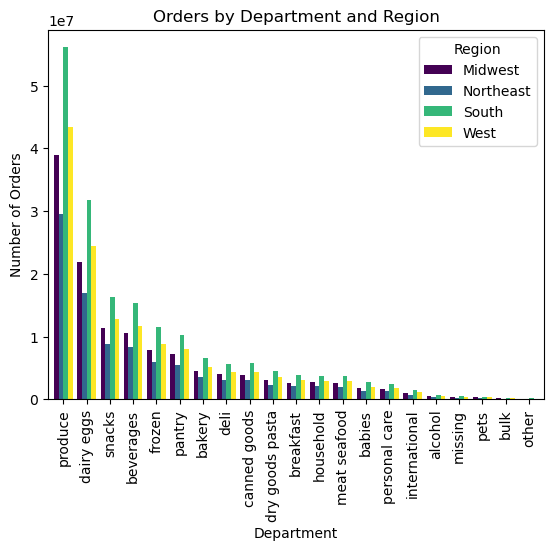

In [38]:
# Pivot the DataFrame to have 'region' as columns
pivot_df = Sub_df.pivot_table(index='department', columns='region', values='order_number', aggfunc='sum', fill_value=0)

# Calculate the total number of orders for each department
pivot_df['TotalOrders'] = pivot_df.sum(axis=1)

# Sort the DataFrame by the total number of orders across all regions
sorted_df = pivot_df.sort_values(by='TotalOrders', ascending=False)

# Drop the 'TotalOrders' column before plotting
sorted_df.drop('TotalOrders', axis=1, inplace=True)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
barchar=sorted_df.plot(kind='bar', cmap='viridis', width=0.8)  # Adjust width as needed

# Customize the plot
plt.title('Orders by Department and Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.legend(title='Region')

# Show the plot
plt.show()

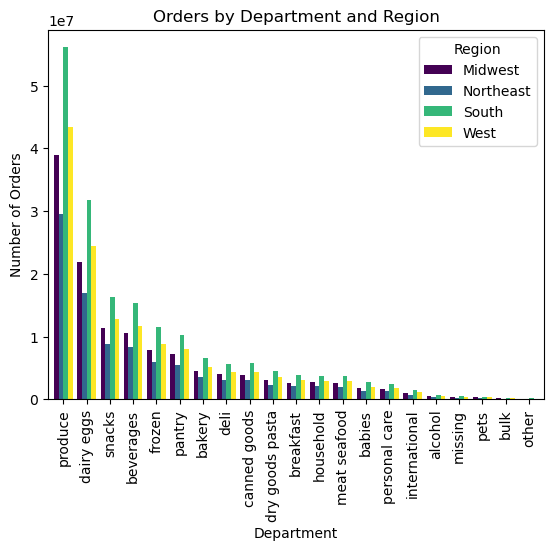

In [39]:
barchar.figure


In [41]:
barchar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_departmentorder.png')) #to export data visualization

In [50]:
Sub_df['order_number'].value_counts(dropna=False)

order_number
1     1661283
2     1630870
3     1630758
5     1626901
4     1626776
       ...   
95      14516
96      13737
97      13356
98      12851
99      12421
Name: count, Length: 99, dtype: int64

Family staus with number of department iver total number of order

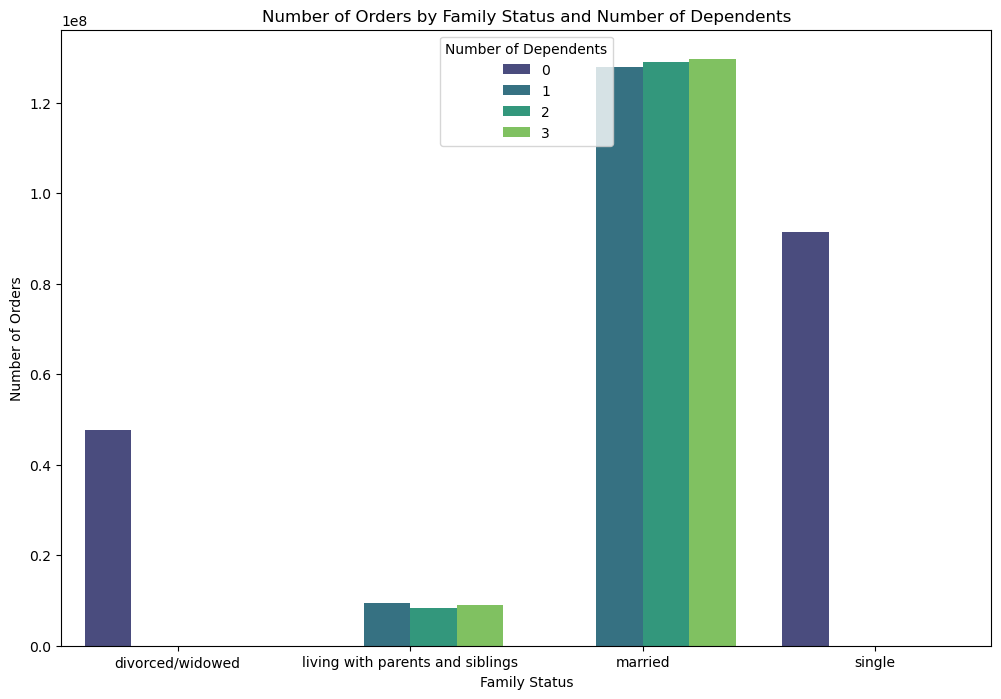

In [48]:
# Group by 'family_status' and 'number_of_dependants', summing the 'order_number'
grouped_df = Sub_df.groupby(['Family_status', 'Number_of_dependants'])['order_number'].sum().reset_index()

# Pivot the DataFrame for better visualization
pivot_df = grouped_df.pivot(index='Family_status', columns='Number_of_dependants', values='order_number')

# Plot the bar chart
plt.figure(figsize=(12, 8))
fam_s=sns.barplot(data=grouped_df, x='Family_status', y='order_number', hue='Number_of_dependants', palette='viridis')

# Customize the plot
plt.title('Number of Orders by Family Status and Number of Dependents')
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.legend(title='Number of Dependents')

# Show the plot
plt.show()

In [52]:
fam_s.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_dep_order.png')) #to export data visualization

ordering habits based on a customer’s region?